# Question 1: Time-series prediction






Prediction can be divided into two categories: regression and classification. In regression, the numerical value of the next days is predicted for a time series. In the classification, the upward or downward trend of the time series is predicted for the next few days.

In this question, you will learn about regression mode and implement a part of:
https://ieeexplore.ieee.org/document/9005997

## Import libraries

In [2]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import datetime
from datetime import datetime
import yfinance as yf
import mplfinance as mpf

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1.1- Download data

In [4]:
table = pd.read_html('https://en.wikipedia.com/wiki/List_of_S%26P_500_companies')
table[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [5]:
New_table = table[0]

In [6]:
New_table_2 = New_table[[ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010,1,1) for dt in New_table['Date added'] ] ]
New_table_2

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
496,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [7]:
My_Tickers = New_table_2['Symbol'].tolist()

if 'BF.B' in My_Tickers:
    My_Tickers.remove('BF.B')

My_Tickers


['MMM',
 'ABT',
 'ADBE',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BA',
 'BKNG',
 'BXP',
 'BSX',
 'BMY',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CAT',
 'CBRE',
 'COR',
 'CNP',
 'CF',
 'CHRW',
 'SCHW',
 'CVX',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CTRA',
 'CSX',
 'CMI',
 'CVS',
 'DHR',
 'DRI',
 'DVA',
 'DE',
 'XRAY',
 'DVN',
 'DFS',
 'DOV',
 'DHI',
 'DTE',
 'DUK',
 'EMN',
 'ETN',
 'EBAY',
 'ECL',
 'EIX',
 'EA',
 'ELV',
 'LLY',
 'EMR',
 'ETR',
 'EOG',
 'EFX',
 'EQR',
 'EL',
 'ES',
 'EXC',
 'EXPE',
 'EXPD',
 'XOM',
 'FAST',
 'FDX',
 'FIS',
 'FITB',
 'FE',
 'FI',
 'FMC',
 'F',
 'BEN',
 'GEN',
 'GD',
 'GE',
 'GIS',
 'G

In [8]:
Raw_price_for_my_tickers = yf.download(tickers=My_Tickers, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  289 of 289 completed


In [9]:
Raw_price_for_my_tickers

EXC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2010-01-04  35.000000  35.099857  34.786018  34.864479  20.010229   6123375   
2010-01-05  34.907276  34.907276  34.015694  34.293865  19.682737   7321805   
2010-01-06  34.286732  34.507847  33.908703  34.500713  19.801453   5732778   
2010-01-07  34.322395  34.679031  34.322395  34.614838  19.866955   7188054   
2010-01-08  34.450787  34.586304  34.386593  34.450787  19.772799   7136601   
...               ...        ...        ...        ...        ...       ...   
2023-12-11  39.349998  39.630001  39.099998  39.520000  39.520000   7793000   
2023-12-12  39.660000  39.660000  39.180000  39.439999  39.439999   5695700   
2023-12-13  39.490002  41.080002  39.340000  41.000000  41.000000   7994500   
2023-12-14  41.220001  41.430000  37.459999  37.900002  37.900002  26399000   
2023-12-15  37.439999  37.500000  35.320000  35.490002  35.490002  38845300   

                   IBM                                      ...         JNJ  \
                  Open        High         Low       Close  ...         Low   
Date                                                        ...               
2010-01-04  125.411087  127.122368  125.095604  126.625237  ...   64.410004   
2010-01-05  125.889099  126.051628  124.378586  125.095604  ...   63.820000   
2010-01-06  124.933075  125.707458  124.101341  124.282982  ...   63.830002   
2010-01-07  124.158699  124.521988  123.240921  123.852776  ...   63.740002   
2010-01-08  123.393883  125.162521  123.374763  125.095604  ...   63.630001   
...                ...         ...         ...         ...  ...         ...   
2023-12-11  162.679993  163.649994  161.949997  163.509995  ...  154.350006   
2023-12-12  163.270004  166.339996  162.919998  164.710007  ...  153.649994   
2023-12-13  164.369995  164.970001  162.740005  163.619995  ...  151.770004   
2023-12-14  162.929993  163.500000  160.149994  162.910004  ...  155.050003   
2023-12-15  162.300003  164.089996  162.039993  162.229996  ...  153.759995   

                                                   CHRW                        \
                 Close   Adj Close    Volume       Open       High        Low   
Date                                                                            
2010-01-04   64.680000   42.974461   9506200  59.220001  59.650002  58.939999   
2010-01-05   63.930000   42.476154  10673100  59.180000  59.490002  57.389999   
2010-01-06   64.449997   42.821651  13171500  57.820000  57.990002  57.200001   
2010-01-07   63.990002   42.516018  10901600  57.080002  57.139999  56.180000   
2010-01-08   64.209999   42.662186   7898000  56.700001  57.619999  56.599998   
...                ...         ...       ...        ...        ...        ...   
2023-12-11  155.059998  155.059998   6090400  84.400002  84.889999  83.720001   
2023-12-12  155.070007  155.070007   5324400  84.550003  84.550003  83.430000   
2023-12-13  155.789993  155.789993  10764600  83.400002  84.860001  82.400002   
2023-12-14  156.869995  156.869995   9240700  85.629997  86.570000  84.779999   
2023-12-15  155.160004  155.160004  21712500  85.260002  86.000000  84.480003   

                                           
                Close  Adj Close   Volume  
Date                                       
2010-01-04  59.340000  42.943432   822900  
2010-01-05  58.110001  42.053295  2352700  
2010-01-06  57.340000  41.496063  1685500  
2010-01-07  56.790001  41.098042  1939600  
2010-01-08  57.549999  41.648041  1332500  
...               ...        ...      ...  
2023-12-11  84.419998  84.419998  1043800  
2023-12-12  83.599998  83.599998  1265100  
2023-12-13  84.849998  84.849998  1531400  
2023-12-14  85.040001  85.040001  1933300  
2023-12-15  84.949997  84.949997  3585500  

[3513 rows x 1734 columns]

In [10]:
Raw_price_for_my_tickers.head()

EXC                                                       \
                 Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2010-01-04  35.000000  35.099857  34.786018  34.864479  20.010229  6123375   
2010-01-05  34.907276  34.907276  34.015694  34.293865  19.682737  7321805   
2010-01-06  34.286732  34.507847  33.908703  34.500713  19.801453  5732778   
2010-01-07  34.322395  34.679031  34.322395  34.614838  19.866955  7188054   
2010-01-08  34.450787  34.586304  34.386593  34.450787  19.772799  7136601   

                   IBM                                      ...        JNJ  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2010-01-04  125.411087  127.122368  125.095604  126.625237  ...  64.410004   
2010-01-05  125.889099  126.051628  124.378586  125.095604  ...  63.820000   
2010-01-06  124.933075  125.707458  124.101341  124.282982  ...  63.830002   
2010-01-07  124.158699  124.521988  123.240921  123.852776  ...  63.740002   
2010-01-08  123.393883  125.162521  123.374763  125.095604  ...  63.630001   

                                                 CHRW                        \
                Close  Adj Close    Volume       Open       High        Low   
Date                                                                          
2010-01-04  64.680000  42.974461   9506200  59.220001  59.650002  58.939999   
2010-01-05  63.930000  42.476154  10673100  59.180000  59.490002  57.389999   
2010-01-06  64.449997  42.821651  13171500  57.820000  57.990002  57.200001   
2010-01-07  63.990002  42.516018  10901600  57.080002  57.139999  56.180000   
2010-01-08  64.209999  42.662186   7898000  56.700001  57.619999  56.599998   

                                           
                Close  Adj Close   Volume  
Date                                       
2010-01-04  59.340000  42.943432   822900  
2010-01-05  58.110001  42.053295  2352700  
2010-01-06  57.340000  41.496063  1685500  
2010-01-07  56.790001  41.098042  1939600  
2010-01-08  57.549999  41.648041  1332500  

[5 rows x 1734 columns]

In [11]:
Raw_price_for_my_tickers.columns

MultiIndex([( 'EXC',      'Open'),
            ( 'EXC',      'High'),
            ( 'EXC',       'Low'),
            ( 'EXC',     'Close'),
            ( 'EXC', 'Adj Close'),
            ( 'EXC',    'Volume'),
            ( 'IBM',      'Open'),
            ( 'IBM',      'High'),
            ( 'IBM',       'Low'),
            ( 'IBM',     'Close'),
            ...
            ( 'JNJ',       'Low'),
            ( 'JNJ',     'Close'),
            ( 'JNJ', 'Adj Close'),
            ( 'JNJ',    'Volume'),
            ('CHRW',      'Open'),
            ('CHRW',      'High'),
            ('CHRW',       'Low'),
            ('CHRW',     'Close'),
            ('CHRW', 'Adj Close'),
            ('CHRW',    'Volume')],
           length=1734)

## 2-1. Exploring time series data and familiarizing with famous theories and libraries

#### Question 1: If the null data was at the beginning, what methods can be used to solve this problem?

If we had null data at the beginning of a time series and we want to handle it, there are several methods we can consider:

* Forward Fill (Pad): This method involves filling missing values with the last known value. This approach assumes that the future values will be similar to the most recent past values.
` Raw_price_for_my_tickers.ffill(inplace=True) `

* Backward Fill (Bfill): This method involves filling missing values with the next available value. Similar to forward fill, it assumes that the past values will be similar to the most recent future values.
`Raw_price_for_my_tickers.bfill(inplace=True)`

* Interpolation: Interpolation is a method where missing values are estimated based on the values around them. There are different interpolation methods available, such as linear interpolation, polynomial interpolation, etc.
`Raw_price_for_my_tickers.interpolate(method='linear', inplace=True)`

* Replace with a Constant: You can replace with cons values.
`Raw_price_for_my_tickers.fillna(value=0, inplace=True)`

#### Question 2: If we have null value data in the middle or at the end of the time series, how do we solve it?


If we have null values in the middle or at the end of a time series, we can use similar methods to handle the missing data. Here are some common approaches:

There are several methods to handle missing values in time series data, including:

* Interpolation: This method replaces missing values with estimates based on the values of surrounding time points. Common interpolation methods include linear interpolation and spline interpolation.

* Extrapolation: This method extends the time series data beyond the existing data points by using mathematical models to estimate missing values.

* Forward-fill and backward-fill: In forward-fill, missing values are filled in with the next available value. In backward-fill, missing values are filled in with the previous available value.

* Last Observation Carried Forward (LOCF): This method replaces missing values with the last observed value.

* Multiple imputation: This method uses statistical methods to generate multiple estimates for missing values and then combines the results to produce a single estimate.

In [12]:
print(Raw_price_for_my_tickers.isna().sum())


EXC   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
CHRW  High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1734, dtype: int64


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [13]:
Raw_price_for_my_tickers.fillna(method='ffill', inplace=True)
Raw_price_for_my_tickers = Raw_price_for_my_tickers.fillna(method='ffill')
print(Raw_price_for_my_tickers.isna().sum())


EXC   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
                  ..
CHRW  High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
Length: 1734, dtype: int64


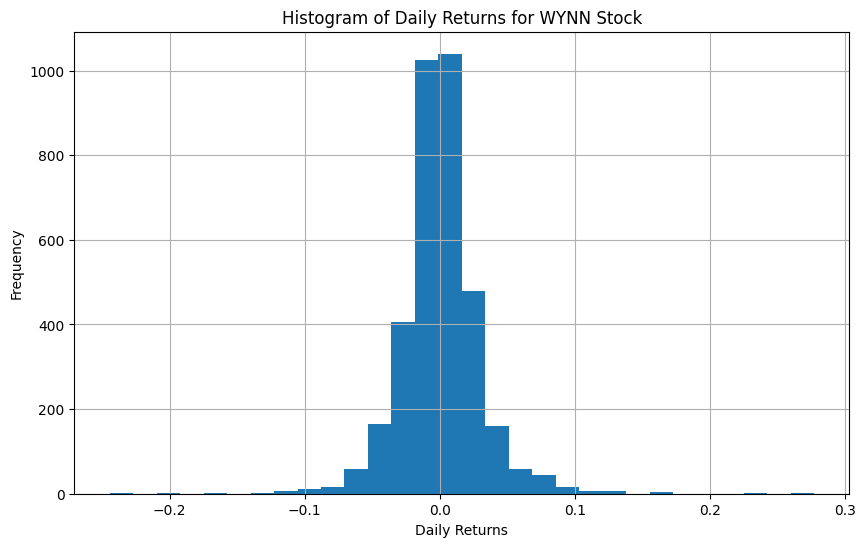

In [14]:
plt.figure(figsize=(10, 6))
( Raw_price_for_my_tickers['WYNN']['Close'].pct_change()).hist(bins=30)
plt.title('Histogram of Daily Returns for WYNN Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

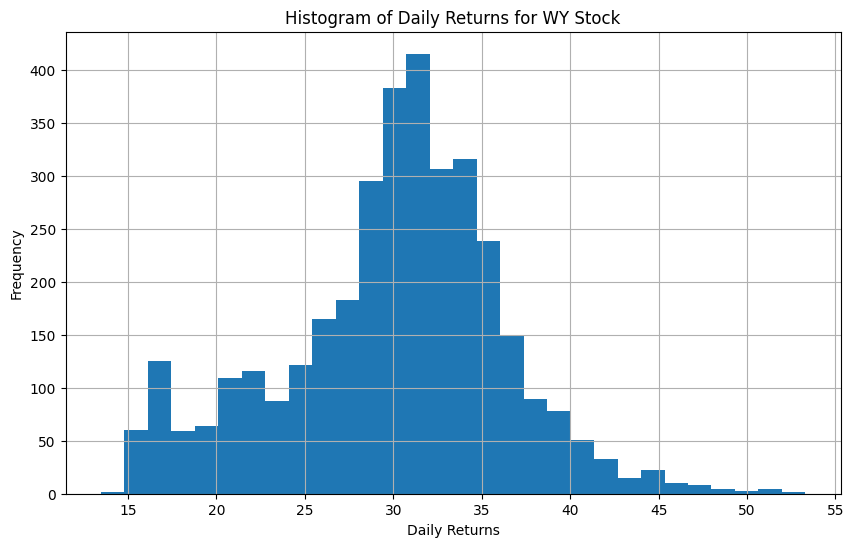

In [15]:
plt.figure(figsize=(10, 6))
(Raw_price_for_my_tickers['WY']['Close']).hist(bins=30)
plt.title('Histogram of Daily Returns for WY Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

According to the Random walks theory, prediction of next days stock closing price is not dependent to anything and it can goes up or down. Based on out plots we can see that if we relay on the previos day for out prediction and getting the trend downward or upward from the charts trend we can get high accuraccy because of the semi-normal values.



So in the marketing data if we look too backward we might get incorrect data and it is better to look a few days before what day we want to predict.

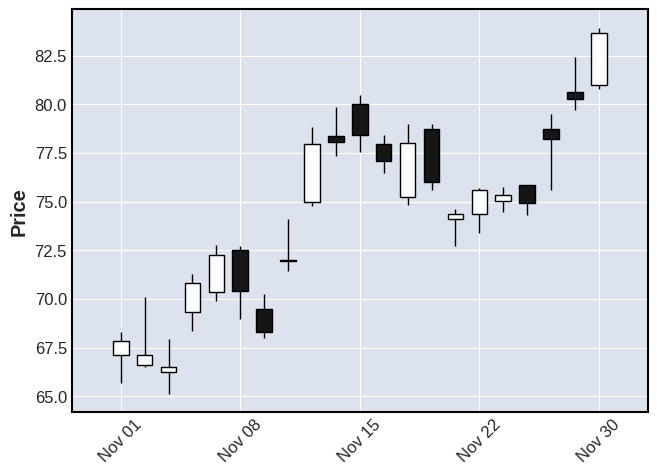

In [16]:
wynn_data = Raw_price_for_my_tickers['WYNN']
wynn_data_november = wynn_data['2022-11-01':'2022-11-30']

mpf.plot(wynn_data_november, type='candle')


## 3-1. TimeSeriesSplit

here we only keep:
selected_tickers = ['AMZN', 'MSFT', 'AAPL', 'META', 'GOOGL']


In [17]:
tickers_to_download = ['GOOGL']
additional_data_google = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['META']
additional_data_META = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AMZN']
additional_data_AMZN = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['MSFT']
additional_data_MSFT = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")
tickers_to_download = ['AAPL']
additional_data_AAPL = yf.download(tickers_to_download, start="2010-01-04", interval="1d", group_by="ticker")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
additional_data_google = additional_data_google.interpolate(method='linear')
additional_data_META = additional_data_META.interpolate(method='linear')
additional_data_AMZN = additional_data_META.interpolate(method='linear')
additional_data_MSFT = additional_data_META.interpolate(method='linear')
additional_data_AAPL = additional_data_META.interpolate(method='linear')


In [19]:
additional_data_google


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2023-12-11,132.380005,133.339996,131.360001,133.289993,133.289993,31138000
2023-12-12,131.809998,133.000000,131.259995,132.520004,132.520004,29032800
2023-12-13,133.380005,133.500000,131.570007,132.570007,132.570007,30104800


In [20]:
additional_data_META

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-12-11,329.399994,329.890015,320.000000,325.279999,325.279999,25802500
2023-12-12,324.600006,334.470001,324.559998,334.220001,334.220001,18485500
2023-12-13,333.929993,338.369995,332.640015,334.739990,334.739990,16353300


In [21]:
combined_data = pd.concat([additional_data_google, additional_data_META], axis=1, keys=['GOOGL', 'META'])
combined_data

GOOGL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   15.689439   15.753504   15.621622   15.684434   15.684434   
2010-01-05   15.695195   15.711712   15.554054   15.615365   15.615365   
2010-01-06   15.662162   15.662162   15.174174   15.221722   15.221722   
2010-01-07   15.250250   15.265265   14.831081   14.867367   14.867367   
2010-01-08   14.814815   15.096346   14.742492   15.065566   15.065566   
...                ...         ...         ...         ...         ...   
2023-12-11  132.380005  133.339996  131.360001  133.289993  133.289993   
2023-12-12  131.809998  133.000000  131.259995  132.520004  132.520004   
2023-12-13  133.380005  133.500000  131.570007  132.570007  132.570007   
2023-12-14  133.380005  133.720001  129.690002  131.940002  131.940002   
2023-12-15  131.619995  133.509995  131.179993  132.600006  132.600006   

                             META                                      \
               Volume        Open        High         Low       Close   
Date                                                                    
2010-01-04   78169752         NaN         NaN         NaN         NaN   
2010-01-05  120067812         NaN         NaN         NaN         NaN   
2010-01-06  158988852         NaN         NaN         NaN         NaN   
2010-01-07  256315428         NaN         NaN         NaN         NaN   
2010-01-08  188783028         NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
2023-12-11   31138000  329.399994  329.890015  320.000000  325.279999   
2023-12-12   29032800  324.600006  334.470001  324.559998  334.220001   
2023-12-13   30104800  333.929993  338.369995  332.640015  334.739990   
2023-12-14   38722400  333.850006  334.700012  328.640015  333.170013   
2023-12-15   50815200  331.989990  338.660004  331.220001  334.920013   

                                    
             Adj Close      Volume  
Date                                
2010-01-04         NaN         NaN  
2010-01-05         NaN         NaN  
2010-01-06         NaN         NaN  
2010-01-07         NaN         NaN  
2010-01-08         NaN         NaN  
...                ...         ...  
2023-12-11  325.279999  25802500.0  
2023-12-12  334.220001  18485500.0  
2023-12-13  334.739990  16353300.0  
2023-12-14  333.170013  19607300.0  
2023-12-15  334.920013  30001600.0  

[3513 rows x 12 columns]

In [22]:
selected_tickers = ['AMZN', 'MSFT', 'AAPL','META','GOOGL']
data_full_scaled_sp500 = yf.download(selected_tickers, start="2010-01-04", interval="1d", group_by="ticker")
data_full_scaled_sp500_cleaned = data_full_scaled_sp500.dropna()
data_full_scaled_sp500_cleaned

[*********************100%%**********************]  5 of 5 completed


META                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2023-12-11  329.399994  329.890015  320.000000  325.279999  325.279999   
2023-12-12  324.600006  334.470001  324.559998  334.220001  334.220001   
2023-12-13  333.929993  338.369995  332.640015  334.739990  334.739990   
2023-12-14  333.850006  334.700012  328.640015  333.170013  333.170013   
2023-12-15  331.989990  338.660004  331.220001  334.920013  334.920013   

                               MSFT                                      ...  \
                 Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2012-05-18  573576400.0   29.790001   29.809999   29.170000   29.270000  ...   
2012-05-21  168192700.0   29.100000   29.790001   29.059999   29.750000  ...   
2012-05-22  101786600.0   29.690001   29.879999   29.500000   29.760000  ...   
2012-05-23   73600000.0   29.350000   29.400000   28.639999   29.110001  ...   
2012-05-24   50237200.0   29.160000   29.299999   28.760000   29.070000  ...   
...                 ...         ...         ...         ...         ...  ...   
2023-12-11   25802500.0  368.480011  371.600006  366.100006  371.299988  ...   
2023-12-12   18485500.0  370.850006  374.420013  370.459991  374.380005  ...   
2023-12-13   16353300.0  376.019989  377.640015  370.769989  374.369995  ...   
2023-12-14   19607300.0  373.309998  373.760010  364.130005  365.929993  ...   
2023-12-15   30001600.0  366.850006  372.399994  366.279999  370.730011  ...   

                 GOOGL                                           AAPL  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2012-05-18   14.932432   15.025025   15.025025  238701060   19.070000   
2012-05-21   15.015015   15.368118   15.368118  122892984   19.089287   
2012-05-22   14.914915   15.035035   15.035035  121953924   20.341070   
2012-05-23   14.942943   15.251752   15.251752  126996876   19.910713   
2012-05-24   14.986737   15.106607   15.106607   75576348   20.566786   
...                ...         ...         ...        ...         ...   
2023-12-11  131.360001  133.289993  133.289993   31138000  193.110001   
2023-12-12  131.259995  132.520004  132.520004   29032800  193.080002   
2023-12-13  131.570007  132.570007  132.570007   30104800  195.089996   
2023-12-14  129.690002  131.940002  131.940002   38722400  198.020004   
2023-12-15  131.179993  132.600006  132.600006   50815200  197.529999   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2012-05-18   19.407499   18.649286   18.942142   16.056868  732292400  
2012-05-21   20.055000   19.073214   20.045713   16.992344  631106000  
2012-05-22   20.495714   19.735001   19.891787   16.861862  694870400  
2012-05-23   20.457144   19.758215   20.377144   17.273287  584897600  
2012-05-24   20.589287   20.043928   20.190001   17.114658  496230000  
...                ...         ...         ...         ...        ...  
2023-12-11  193.490005  191.419998  193.179993  193.179993   60943700  
2023-12-12  194.720001  191.720001  194.710007  194.710007   52696900  
2023-12-13  198.000000  194.850006  197.96000

Here in time series cross validation is not possible as before:

https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

The idea of cross-validation should be more straightforward to grasp when we look at an example. Imagine that we have only 5 observations in our cross-validation set and we want to perform 4-fold cross-validation.

Here is the dataset: [1, 2, 3, 4, 5]

There is only one way to generate such pairs from my dataset. As a result, I get 4 pairs of training/test sets:

- Training: [1] Test: [2]

- Training: [1, 2] Test: [3]

- Training: [1, 2, 3] Test: [4]

- Training: [1, 2, 3, 4] Test: [5]

Compute the average of the accuracies of the 4 test fold.

In [23]:
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits = cv_n_splits )

## 4-1. Preparing input and output model

**The input of the model** is the data of previous days. This data can only include the price close of the last few days. Or it can include open, high, low, and volume data. To reduce dimensionality, usually only price close is used to train the model.

**The output of the price model** is a specific day in the future (Horizon). For this exercise, you will only predict the next day's data

In [24]:

window_size = 5
cv_n_splits = 5
tss = sklearn.model_selection.TimeSeriesSplit(n_splits=cv_n_splits)

x_tickers_sp500 = []
y_tickers_sp500 = []

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Loop through each ticker
for ticker_name in selected_tickers:
    X_time_series = []
    Y_time_series = []

    for i in range(window_size, len(data_full_scaled_sp500_cleaned[ticker_name])):
      X_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i-window_size:i])
      Y_time_series.append( data_full_scaled_sp500_cleaned[ticker_name]['Close'][i])

    X_time_series = np.array(X_time_series)
    Y_time_series = np.array(Y_time_series)

    x_tickers_sp500.append( X_time_series[(31 - window_size):])
    y_tickers_sp500.append( Y_time_series[(31 - window_size):])




In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_tickers_sp500_normalized = [scaler.fit_transform(array) for array in x_tickers_sp500]
y_tickers_sp500_normalized = [scaler.fit_transform(array.reshape(-1, 1)) for array in y_tickers_sp500]
print("Length of y_tickers_sp500[0]:", len(y_tickers_sp500_normalized[0]))
print("Length of x_tickers_sp500[0]:", len(x_tickers_sp500_normalized[0]))


Length of y_tickers_sp500[0]: 2883
Length of x_tickers_sp500[0]: 2883


In [26]:
print(len(x_tickers_sp500[0]))
print(len(y_tickers_sp500[0]))


2883
2883


## 5-1. Neural network models with memory

In [27]:
import random
number_of_runs = 0
seed_value = 2

In [28]:
for ticker_name in selected_tickers:
  full_data = data_full_scaled_sp500_cleaned[ticker_name]
  print(ticker_name , len(full_data))
  #print(full_data['Close'][0])

  # Time series split
  for j, (train_index, test_index) in enumerate(tss.split(full_data)):

    #Different seeds
    for new_seed in range(5):
#      seed_value = new_seed
      random.seed(seed_value)
      np.random.seed(seed_value)
      tf.random.set_seed(seed_value)
      keras.utils.set_random_seed(seed_value)

      number_of_runs += 1

      train_data = full_data['Close'][train_index]
      test_data = full_data['Close'][test_index]

AMZN 2914
MSFT 2914
AAPL 2914
META 2914
GOOGL 2914


In [29]:
train_data.head()


Date
2012-05-18    15.025025
2012-05-21    15.368118
2012-05-22    15.035035
2012-05-23    15.251752
2012-05-24    15.106607
Name: Close, dtype: float64

In [30]:
test_data.head()


Date
2022-01-12    141.430496
2022-01-13    138.587006
2022-01-14    139.480499
2022-01-18    135.998001
2022-01-19    135.116501
Name: Close, dtype: float64

In [31]:
print(test_data.shape)
print(len(x_tickers_sp500_normalized[0]))

(485,)
2883


### 5-1.1 LSTM model

In [32]:
x_train = np.concatenate(x_tickers_sp500_normalized, axis=0)
y_train = np.concatenate(y_tickers_sp500_normalized, axis=0)


In [33]:
x_train.shape

(14415, 5)

In [34]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))


In [35]:
x_train.shape

(14415, 5, 1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import RepeatVector


In [37]:
input_shape = (x_train.shape[1], x_train.shape[2])

In [38]:
def plot_loss(history, model_name):
  plt.plot(history.history['loss'])
  plt.title(f'{model_name} Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()


In [39]:
def prediction(model):
    prediction = model.predict(x_train)
    # prediction = scaler.inverse_transform(prediction)
    return prediction

def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    mae = np.abs(errors).mean()
    # mape = np.mean(np.abs(errors / np.maximum(np.abs(actual), 1))) * 100
    mask = actual != 0
    mape = np.mean(np.abs(errors[mask] / np.maximum(np.abs(actual[mask]), 1))) * 100

    print(model_name + ':')
    print('Mean Square Error: {:.4f}'.format(mse))
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Mean Absolute Percentage Error: {:.4f}%'.format(mape))
    print('')


Epoch 1/10
97/97 [==============================] - 7s 23ms/step - loss: 0.0153
Epoch 2/10
97/97 [==============================] - 1s 15ms/step - loss: 3.4305e-04
Epoch 3/10
97/97 [==============================] - 1s 15ms/step - loss: 2.8140e-04
Epoch 4/10
97/97 [==============================] - 2s 23ms/step - loss: 2.6805e-04
Epoch 5/10
97/97 [==============================] - 2s 19ms/step - loss: 2.6431e-04
Epoch 6/10
97/97 [==============================] - 1s 15ms/step - loss: 2.6655e-04
Epoch 7/10
97/97 [==============================] - 2s 18ms/step - loss: 2.6309e-04
Epoch 8/10
97/97 [==============================] - 3s 28ms/step - loss: 2.6639e-04
Epoch 9/10
97/97 [==============================] - 2s 16ms/step - loss: 2.6192e-04
Epoch 10/10
97/97 [==============================] - 1s 15ms/step - loss: 2.6371e-04


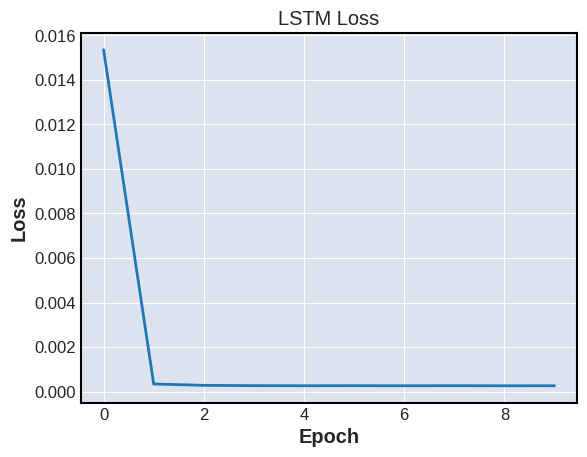

In [40]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape))
lstm_model.add(LSTM(units=50, activation='tanh'))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(lstm_history, 'LSTM')

### 5-1.2 GRU model

In [41]:
from tensorflow.keras.layers import GRU, Dense, Dropout

Epoch 1/10
97/97 [==============================] - 5s 12ms/step - loss: 0.0114
Epoch 2/10
97/97 [==============================] - 1s 11ms/step - loss: 2.0560e-04
Epoch 3/10
97/97 [==============================] - 2s 17ms/step - loss: 2.0176e-04
Epoch 4/10
97/97 [==============================] - 2s 18ms/step - loss: 2.0100e-04
Epoch 5/10
97/97 [==============================] - 1s 13ms/step - loss: 1.9698e-04
Epoch 6/10
97/97 [==============================] - 1s 12ms/step - loss: 1.9788e-04
Epoch 7/10
97/97 [==============================] - 1s 12ms/step - loss: 1.9284e-04
Epoch 8/10
97/97 [==============================] - 1s 11ms/step - loss: 1.9326e-04
Epoch 9/10
97/97 [==============================] - 1s 12ms/step - loss: 1.8893e-04
Epoch 10/10
97/97 [==============================] - 1s 12ms/step - loss: 1.8899e-04


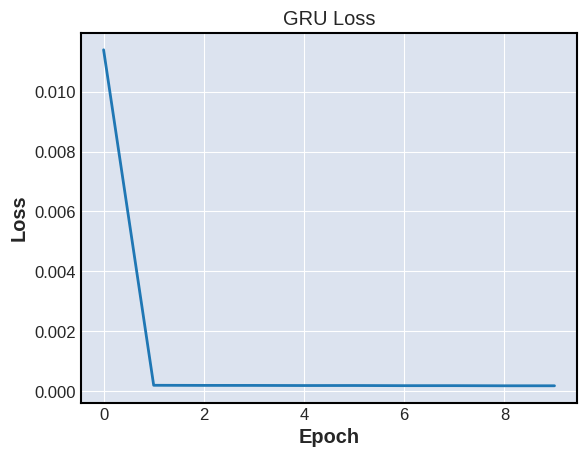

In [42]:
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences = True, activation='tanh', input_shape=input_shape))
gru_model.add(GRU(units=50, activation='tanh'))
gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(gru_history, 'GRU')

### 5-1.3 Bidirectional LSTM (Bi-LSTM) Model:

In [43]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout


Epoch 1/10
97/97 [==============================] - 12s 44ms/step - loss: 0.0095
Epoch 2/10
97/97 [==============================] - 3s 27ms/step - loss: 2.3140e-04
Epoch 3/10
97/97 [==============================] - 3s 28ms/step - loss: 2.1927e-04
Epoch 4/10
97/97 [==============================] - 3s 28ms/step - loss: 2.1698e-04
Epoch 5/10
97/97 [==============================] - 5s 47ms/step - loss: 2.1334e-04
Epoch 6/10
97/97 [==============================] - 3s 27ms/step - loss: 2.1509e-04
Epoch 7/10
97/97 [==============================] - 3s 28ms/step - loss: 2.1122e-04
Epoch 8/10
97/97 [==============================] - 3s 27ms/step - loss: 2.1137e-04
Epoch 9/10
97/97 [==============================] - 4s 39ms/step - loss: 2.0934e-04
Epoch 10/10
97/97 [==============================] - 3s 35ms/step - loss: 2.1027e-04


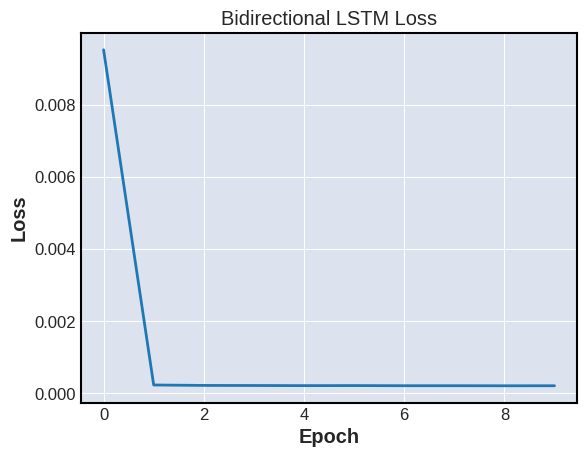

In [44]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences = True, activation='tanh', input_shape=input_shape)))
bilstm_model.add(Bidirectional(LSTM(units=50, activation='tanh')))
bilstm_model.add(Dense(units=1))

bilstm_model.compile(optimizer='adam', loss='mse')
bilstm_history = bilstm_model.fit(x_train, y_train, epochs=10, batch_size = 150)

plot_loss(bilstm_history, 'Bidirectional LSTM')

In [45]:
prediction_lstm = prediction(lstm_model)
prediction_gru = prediction(gru_model)
prediction_bilstm = prediction(bilstm_model)

evaluate_prediction(prediction_lstm, y_train, 'LSTM')
evaluate_prediction(prediction_gru, y_train, 'GRU')
evaluate_prediction(prediction_bilstm, y_train, 'Bi-LSTM')

451/451 [==============================] - 4s 4ms/step
LSTM:
Mean Square Error: 0.0003
Mean Absolute Error: 0.0097
Mean Absolute Percentage Error: 0.9712%

GRU:
Mean Square Error: 0.0002
Mean Absolute Error: 0.0081
Mean Absolute Percentage Error: 0.8123%

Bi-LSTM:
Mean Square Error: 0.0002
Mean Absolute Error: 0.0084
Mean Absolute Percentage Error: 0.8422%



### 5-1.4 Multi-Layer Perceptron (MLP) Model:


In [46]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [47]:
x_train_flatten = x_train.reshape((x_train.shape[0], -1))

In [48]:
mlp_model = Sequential()
mlp_model.add(Dense(units=256, activation='relu', input_shape=(x_train_flatten.shape[1],)))
mlp_model.add(Dense(units=1, activation='linear'))

mlp_model.compile(optimizer='adam', loss='mse')

In [49]:
mlp_model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 2/10
451/451 [==============================] - 1s 2ms/step - loss: 1.5786e-04
Epoch 3/10
451/451 [==============================] - 1s 2ms/step - loss: 1.4228e-04
Epoch 4/10
451/451 [==============================] - 1s 2ms/step - loss: 1.4078e-04
Epoch 5/10
451/451 [==============================] - 1s 2ms/step - loss: 1.3343e-04
Epoch 6/10
451/451 [==============================] - 1s 2ms/step - loss: 1.3801e-04
Epoch 7/10
451/451 [==============================] - 1s 2ms/step - loss: 1.3331e-04
Epoch 8/10
451/451 [==============================] - 1s 2ms/step - loss: 1.4330e-04
Epoch 9/10
451/451 [==============================] - 1s 2ms/step - loss: 1.3815e-04
Epoch 10/10
451/451 [==============================] - 1s 2ms/step - loss: 1.3948e-04


### 5-1.5 Convolutional Neural Network (CNN) Model:


In [50]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [51]:
input_shape_cnn = (x_train.shape[1], x_train.shape[2])


In [52]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape_cnn))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Dense(units=1, activation='linear'))
cnn_model.compile(optimizer='adam', loss='mse')

In [53]:
cnn_model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
451/451 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 2/10
451/451 [==============================] - 1s 2ms/step - loss: 3.0087e-04
Epoch 3/10
451/451 [==============================] - 1s 2ms/step - loss: 2.9964e-04
Epoch 4/10
451/451 [==============================] - 1s 2ms/step - loss: 2.9900e-04
Epoch 5/10
451/451 [==============================] - 1s 2ms/step - loss: 2.9613e-04
Epoch 6/10
451/451 [==============================] - 1s 2ms/step - loss: 2.8914e-04
Epoch 7/10
451/451 [==============================] - 1s 2ms/step - loss: 2.8343e-04
Epoch 8/10
451/451 [==============================] - 1s 3ms/step - loss: 2.8108e-04
Epoch 9/10
451/451 [==============================] - 1s 2ms/step - loss: 2.7508e-04
Epoch 10/10
451/451 [==============================] - 1s 2ms/step - loss: 2.7305e-04


### 5-1.6 Convolutional LSTM Model:



In [54]:
print(x_train.shape)

(14415, 5, 1)


Epoch 1/10
97/97 [==============================] - 8s 38ms/step - loss: 0.0942
Epoch 2/10
97/97 [==============================] - 5s 56ms/step - loss: 0.0822
Epoch 3/10
97/97 [==============================] - 4s 38ms/step - loss: 0.0825
Epoch 4/10
97/97 [==============================] - 4s 38ms/step - loss: 0.0825
Epoch 5/10
97/97 [==============================] - 5s 50ms/step - loss: 0.0823
Epoch 6/10
97/97 [==============================] - 4s 44ms/step - loss: 0.0824
Epoch 7/10
97/97 [==============================] - 4s 38ms/step - loss: 0.0825
Epoch 8/10
97/97 [==============================] - 4s 42ms/step - loss: 0.0821
Epoch 9/10
97/97 [==============================] - 5s 51ms/step - loss: 0.0822
Epoch 10/10
97/97 [==============================] - 4s 38ms/step - loss: 0.0824


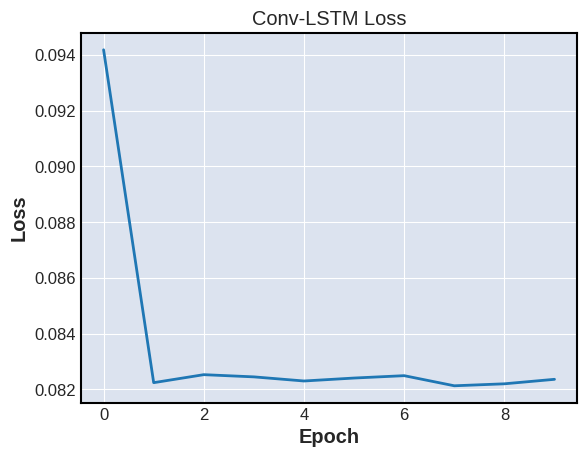

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense

# Reshape the input data to have the necessary dimensions
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1, x_train.shape[2], 1))

# Build the Conv-LSTM model
input_shape = (5, 1, 1, 1)
conv_lstm_model = Sequential()
conv_lstm_model.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same', input_shape=input_shape, return_sequences=True))
conv_lstm_model.add(ConvLSTM2D(filters=50, kernel_size=(1, 3), activation='tanh', padding='same'))
conv_lstm_model.add(Dense(units=1))

conv_lstm_model.compile(optimizer='adam', loss='mse')

# Train the model with the reshaped data
conv_lstm_history = conv_lstm_model.fit(x_train_reshaped, y_train, epochs=10, batch_size=150)

# Plot the loss
plot_loss(conv_lstm_history, 'Conv-LSTM')


In [71]:
print(prediction_conv_lstm.reshape((14415, 1)))
print('------')
print(y_train)

[[0.33371994]
 [0.33372223]
 [0.33372384]
 ...
 [0.34024256]
 [0.34024984]
 [0.3401987 ]]
------
[[0.00403009]
 [0.0033276 ]
 [0.00275593]
 ...
 [0.87261574]
 [0.86796839]
 [0.87283703]]


In [72]:
prediction_mlp = prediction(mlp_model)
prediction_cnn = prediction(cnn_model)
# prediction_conv_lstm = conv_lstm_model.predict(x_train)

x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1], 1, x_train.shape[2], 1))
prediction_conv_lstm = conv_lstm_model.predict(x_train_reshaped)

evaluate_prediction(prediction_mlp, y_train, 'MLP')
evaluate_prediction(prediction_cnn.reshape((14415, 1)), y_train, 'CNN')
evaluate_prediction(prediction_conv_lstm.reshape((14415, 1)), y_train, 'Conv-LSTM')

451/451 [==============================] - 2s 4ms/step
MLP:
Mean Square Error: 0.0001
Mean Absolute Error: 0.0076
Mean Absolute Percentage Error: 0.7630%

CNN:
Mean Square Error: 0.0003
Mean Absolute Error: 0.0097
Mean Absolute Percentage Error: 0.9703%

Conv-LSTM:
Mean Square Error: 0.0809
Mean Absolute Error: 0.2445
Mean Absolute Percentage Error: 24.4482%



#Naïve Forecast

In [73]:
print(x_train.shape)

(14415, 5, 1)


In [80]:
x_train_naive_forcast = x_train.reshape((14415, 5))
print(x_train_naive_forcast.shape)
print(y_train.shape)

(14415, 5)
(14415, 1)


Original y_train:
 [0.00403009 0.0033276  0.00275593 ... 0.87261574 0.86796839 0.87283703]

Naïve Forecast:
 [0.         0.00403009 0.0033276  ... 0.87224688 0.87261574 0.86796839]


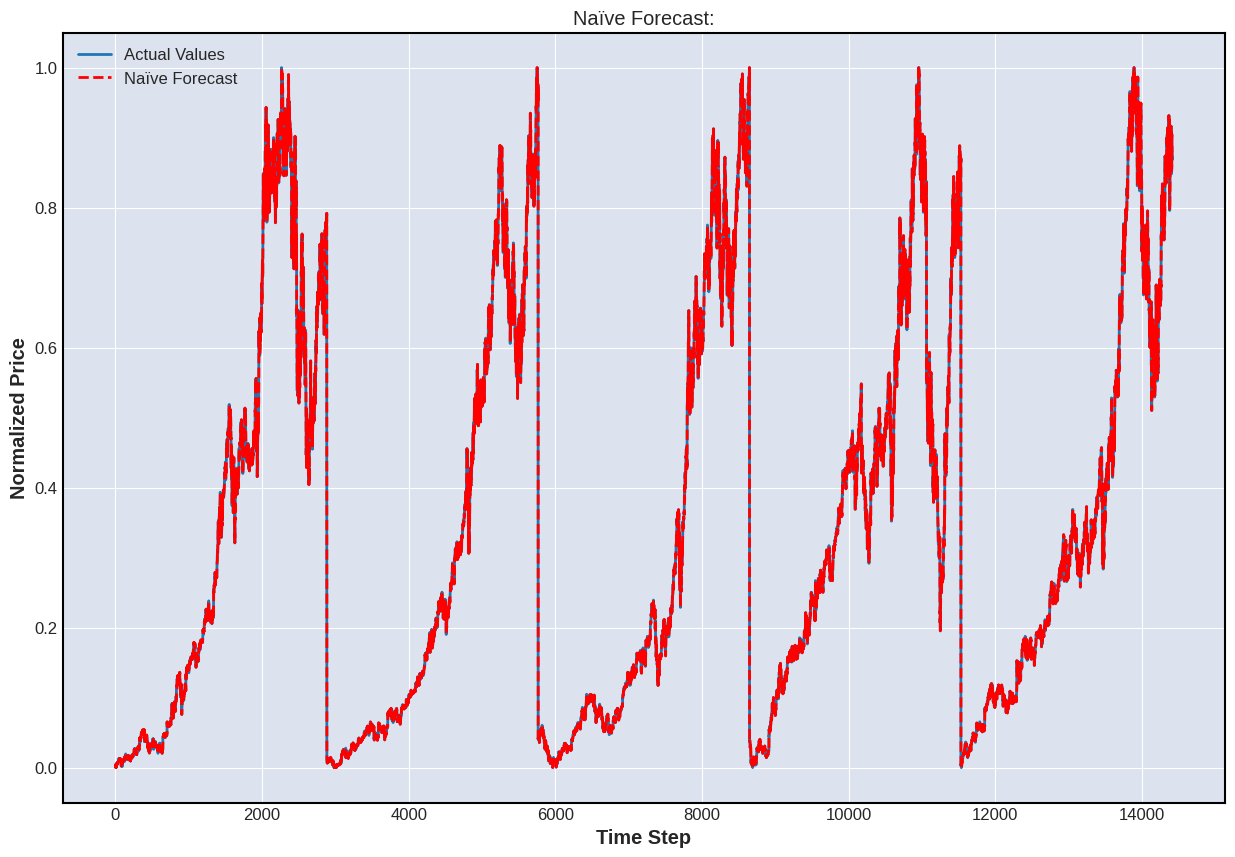

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Function to implement Naïve Forecast for univariate time series
def naive_forecast(x_train, y_train):
    # Shift the y_train values by one time step
    naive_forecasted = np.roll(y_train, shift=1, axis=0)
    naive_forecasted[0] = 0  # Set the first value to NaN since there is no previous value for the first time step
    return naive_forecasted

# Apply Naïve Forecast to the dataset
naive_forecasted = naive_forecast(x_train, y_train)

# Print the resulting arrays with Naïve Forecast
print("Original y_train:\n", y_train[:, 0])
print("\nNaïve Forecast:\n", naive_forecasted[:, 0])

# Plot the actual values and Naïve Forecast
plt.figure(figsize=(15, 10))
plt.plot(y_train[:, 0], label='Actual Values')
plt.plot(naive_forecasted[:, 0], label='Naïve Forecast', linestyle='dashed', color='red')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.legend()
plt.title('Naïve Forecast:')
plt.show()


In [88]:
evaluate_prediction(naive_forecasted, y_train, 'Naïve Forecast')

Naïve Forecast:
Mean Square Error: 0.0003
Mean Absolute Error: 0.0060
Mean Absolute Percentage Error: 0.6013%

